# What Makes the Best Defensive Footballers?
**Analyzing player attributes from FIFA '17 player rankings.**

Author: Brian Daisey

## Introduction

Look at the defense, unsung heroes, yada, yada

### Libraries Used

- Pandas
- Numpy
- Matplotlib - pyplot
- Seaborn
- scikit-learn - linear-model
- statsmodels - api

### Outline

1. Getting Started
  - 1.1 Dataset Source
  - 1.2 Load and View Data
  - 1.3 Isolate Top 1000 Players
  - 1.4 Isolate Defenders
2. Explore Top 1000 Players
  - 2.1 Top 1000 Player Breakdown by Position 
  - 2.2 How Many Defenders in Top 1000?
3. Explore Defenders
  - 3.1 Defenders by Position
  - 3.2 Defenders by Rating
4. Begin Defender Analysis
  - 4.1 Selection of Attributes 
  - 4.2 Attributes vs. Rating, Visually
5. Reveal Key Attributes with Multiple Linear Regression
  - 5.1 Null Hypothesis
  - 5.2 Regression with scikit-learn
  - 5.3 Regression with statsmodels
6. Predict Rating From Attributes with Machine Learning
  - 6.1 Predictions with Train/Test Split
  - 6.2 Refine and (Hopefully) Improve the Model with Cross Validation
7. Conclusions
  - 7.1 Key Attributes
  - 7.2 Prediction of Overall Rating

****

# 1. Getting Started

## 1.1 Dataset Source

The dataset used is the ranking for all 17,588 players present in the popular video game FIFA 2017.  It contains detailed rankings for all feasible aspects of a players performance, most of which are a ranking out of 100.  There is also qualitative data such as Position, Nationality and Club Name.  In this project we will be concerned with the quantitave rankings of the players and their postitions.

The dataset was found on Kaggle.  There is not much metadata on the Kaggle page, so FIFA Index was used to gain a greater understanding of the attributes present in the dataset and their meaning.  Luckily, the FIFA Index pages for individual player statistics very closely match the terms used in the Kaggle dataset.

- Kaggle dataset [here](https://www.kaggle.com/artimous/complete-fifa-2017-player-dataset-global/data).
- Example of individual player page on Fifa Index [here](https://www.fifaindex.com/player/20801/cristiano-ronaldo/).

## 1.2 Load and View Data

(See Libraries Used section above)

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from statsmodels import api as sm

In [215]:
# load csv file and display first 5 rows
fifa = pd.read_csv("FullData.csv")
fifa.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [59]:
# display some basic statistics about the dataset
fifa.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,1075.000000,17587.000000,17587.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,...,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,12.219535,21.294536,2018.899414,66.166193,25.460314,2.934103,2.303161,57.972766,54.802877,44.230327,...,47.403173,47.181146,43.383443,49.165738,43.275586,16.609620,16.823061,16.458324,16.559814,16.901183
std,6.933187,19.163741,1.698787,7.083012,4.680217,0.655927,0.746156,16.834779,18.913857,21.561703,...,19.211887,18.464396,17.701903,15.871735,17.710839,17.139904,17.798052,16.600741,16.967256,18.034485
min,1.000000,1.000000,2017.000000,45.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,...,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,9.000000,2017.000000,62.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,...,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,12.000000,18.000000,2019.000000,66.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,...,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,27.000000,2020.000000,71.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,...,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,36.000000,99.000000,2023.000000,94.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,...,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


Two columns that will be very important for further analysis are 'Rating' and 'Club_Position', so we need to keep only the rows where those columns both have actual values.

In [85]:
fifa = fifa[pd.notnull(fifa['Rating'])]
fifa = fifa[pd.notnull(fifa['Club_Position'])]
fifa.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,1075.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,...,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000,17587.000000
mean,12.219535,21.294536,2018.899414,66.165349,25.459544,2.934042,2.303122,57.971513,54.801785,44.231592,...,47.401376,47.179394,43.381134,49.163757,43.273725,16.610223,16.823449,16.458805,16.560130,16.901348
std,6.933187,19.163741,1.698787,7.082330,4.679237,0.655896,0.746159,16.834438,18.913841,21.561664,...,19.210956,18.463458,17.699756,15.870012,17.709623,17.140204,17.798483,16.601091,16.967686,18.034984
min,1.000000,1.000000,2017.000000,45.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,...,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,9.000000,2017.000000,62.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,...,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,12.000000,18.000000,2019.000000,66.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,...,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,27.000000,2020.000000,71.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,...,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,36.000000,99.000000,2023.000000,94.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,...,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


These columns were nearly complete originally.  From the description of the data above, it appears that only one row was dropped from the dataset.

## 1.3 Isolate Top 1000 Players

In [119]:
# sort descending by Rating
sorted = fifa.copy().sort_values('Rating', ascending=False)

# get top 1000 players
top1000 = sorted.copy().head(1000)
top1000.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


If you view more than just the head of this dataset, lowest rating among top 1000 is 77.  There are more players ranked 77, so they get short shrift.  Too bad.

## 1.4 Isolate Defenders

To isolate the defenders from this dataset, let's first view all the unique position names from the column 'Club_Position'.  This column was used over National Position because it has values for all players in the dataset, while National Position only has slightly over 1000 values filled.

In [87]:
fifa.Club_Position.unique()

array(['LW', 'RW', 'ST', 'GK', 'Sub', 'RCM', 'CAM', 'LCB', 'LCM', 'RS',
       'RB', 'RCB', 'LM', 'LDM', 'RM', 'LB', 'CDM', 'RDM', 'LF', 'CB',
       'LAM', 'Res', 'CM', 'LS', 'RF', 'RWB', 'RAM', 'LWB', 'CF'], dtype=object)

To see what these abbreviations actually correspond to, here is an image of football positions on a field:

<img src="soccer_positions.jpg" style="width:600px;"/>


The 7 defensive positions are circled in red above.  The abbreviations stand for Left Wingback, Left Back, Left Center Back, Center Back, Right Center Back, Right Back, and Right Wingback.

Now we can make a list of the defensive position acronyms and filter the dataset to return only the defensive players.

In [88]:
def_positions = ['LWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'RWB']
defenders = fifa.copy()
defenders = defenders[defenders['Club_Position'].isin(def_positions)]
defenders.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
15,Thiago Silva,Brazil,Sub,14.0,PSG,LCB,2.0,07/01/2012,2020.0,89,...,71,61,73,71,63,9,9,5,12,10
16,Sergio Ramos,Spain,LCB,15.0,Real Madrid,LCB,4.0,08/01/2005,2020.0,89,...,55,73,67,68,66,7,11,9,8,11
24,Diego Godín,Uruguay,LCB,3.0,Atlético Madrid,LCB,2.0,08/01/2010,2019.0,88,...,43,49,51,50,47,5,6,15,8,15
25,Mats Hummels,Germany,LCB,5.0,FC Bayern,LCB,5.0,07/01/2016,2021.0,88,...,51,65,53,68,60,5,15,10,6,6
27,Giorgio Chiellini,Italy,LCB,3.0,Juventus,LCB,3.0,07/01/2005,2018.0,88,...,49,60,31,50,45,4,3,2,3,3


Verify we still have all 7 defensive positions represented.

In [89]:
defenders.Club_Position.unique()

array(['LCB', 'RB', 'RCB', 'LB', 'CB', 'RWB', 'LWB'], dtype=object)

From the counts in Rating and individual attributes below, it appears that 2,534 out of the total 17,587 players are listed as defensive players.

In [90]:
defenders.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,198.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,...,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000,2534.000000
mean,10.070707,14.911208,2018.826756,68.732044,26.938043,2.842541,2.123520,59.636543,53.398185,66.851618,...,42.773481,45.623520,41.534333,45.276243,37.470008,10.714680,10.694949,10.770324,10.747040,10.715864
std,7.000004,14.730465,1.651298,5.989564,4.093811,0.610532,0.338559,9.757831,13.485955,7.735976,...,15.472043,15.660997,14.874850,11.765115,12.713013,3.193751,3.124549,3.309674,3.184599,3.192558
min,2.000000,2.000000,2017.000000,49.000000,18.000000,1.000000,2.000000,25.000000,14.000000,23.000000,...,11.000000,11.000000,10.000000,11.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,2017.250000,65.000000,24.000000,2.000000,2.000000,54.000000,44.000000,62.000000,...,30.000000,33.000000,30.000000,37.000000,28.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,6.000000,12.000000,2018.000000,69.000000,27.000000,3.000000,2.000000,61.000000,56.000000,67.000000,...,42.000000,44.000000,39.000000,44.000000,35.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,16.000000,23.000000,2020.000000,72.000000,30.000000,3.000000,2.000000,66.000000,64.000000,72.000000,...,55.000000,58.000000,52.000000,53.000000,46.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,23.000000,98.000000,2023.000000,89.000000,39.000000,5.000000,4.000000,87.000000,84.000000,92.000000,...,88.000000,86.000000,87.000000,90.000000,80.000000,32.000000,32.000000,41.000000,33.000000,34.000000


# 2. Explore Top 1000 Players

## 2.1 Top 1000 Player Breakdown by Position

Need to group the players by position and get a count of how many play at each position.  Then sort the results.

In [106]:
by_position = top1000.groupby(top1000['Club_Position']).count().reset_index()
by_position = by_position[['Club_Position','Rating']]
by_position = by_position.sort_values('Rating', ascending=False)
by_position.columns = ['Club_Position','Count']
by_position.head(13)

,Club_Position,Count
27,Sub,295
4,GK,83
26,ST,66
17,RCB,64
7,LCB,59
0,CAM,37
16,RB,36
8,LCM,35
18,RCM,35
21,RM,32


**Unexpected Results!**

This is not an ideal result because of the 'Sub' and 'Res' players that are in the dataset.  Substitutes and Reserves represent a variety of positions, so this is not informative for our analysis of the breakdown of the top 1000 players by position.

First we drop all 'Sub' and 'Res' players from the dataset.  Then, resample and re-group the top 1000 players.

In [126]:
# drop substitute and reserve players
drop_sub_res = fifa.copy()
drop_sub_res = drop_sub_res[drop_sub_res['Club_Position'] != 'Sub']
drop_sub_res = drop_sub_res[drop_sub_res['Club_Position'] != 'Res']

# sort descending by Rating
sorted = drop_sub_res.copy().sort_values('Rating', ascending=False)

# get top 1000 players
new_top1000 = sorted.copy().head(1000)

by_position = new_top1000.groupby(new_top1000['Club_Position']).count().reset_index()
by_position = by_position[['Club_Position','Rating']]
by_position = by_position.sort_values('Rating', ascending=False)
by_position.columns = ['Club_Position','Count']
by_position.head()

,Club_Position,Count
4,GK,119
17,RCB,99
25,ST,88
7,LCB,81
0,CAM,56


In [123]:
by_position['Club_Position'].unique()

array(['GK', 'RCB', 'ST', 'LCB', 'CAM', 'LB', 'RB', 'RM', 'LCM', 'LM',
       'RCM', 'RDM', 'LW', 'LDM', 'RW', 'LS', 'CDM', 'RS', 'CB', 'CM',
       'RAM', 'LWB', 'RWB', 'LAM', 'RF', 'LF'], dtype=object)

Much better.  We can see that all 'Sub' and 'Res' players have been removed from our top 1000 players.

Let's now plot a histogram of the breakdown of the positions among the top 1000 players.

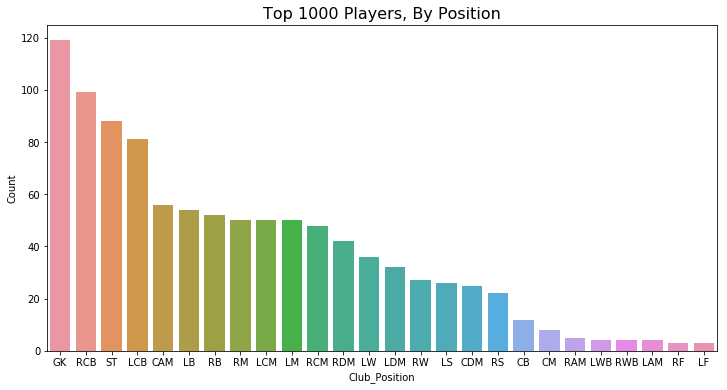

In [124]:
plt.figure(figsize=(12,6))
plt.title("Top 1000 Players, By Position", fontsize=16)
sns.barplot(data=by_position, x='Club_Position', y='Count')
plt.show()

Obsevations:
  - Goalkeepers (GK) are the most represented position among the top 1000 players.
  - Strikers (ST), at 3rd most represented, are the only offensive players in the top 12 positions.
  - The remaining 10 of the top 12 spots are split between defensive and midfield players.

## 2.2 How Many Defenders in Top 1000?

In [127]:
def1000 = new_top1000.copy()
def1000 = def1000[def1000['Club_Position'].isin(def_positions)]
res = def1000.Rating.count()
print("There are {} defenders among the top 1000 players.".format(res))

There are 306 defenders among the top 1000 players.


There are 3 main categories of positions in football: defensive, midfield, and offensive.  Subtracting the 119 Goalkeeprs found above, defensive players make up very close to 1/3 of the remaining top 1000 players.

# 3. Explore Defenders

## 3.1 Defenders by Position

Let's now take a look at the breakdown of total defensive players by position. Follow the same paradigm as player breakdown in Section 2.1: Group by position, get a count, sort descending, plot!

In [132]:
def_grouped = defenders.groupby(defenders['Club_Position']).count().reset_index()
def_grouped = def_grouped[['Club_Position','Rating']]
def_grouped = def_grouped.sort_values('Rating', ascending=False)
def_grouped.columns = ['Club_Position','Count']
def_grouped

,Club_Position,Count
5,RCB,633
2,LCB,631
1,LB,549
4,RB,548
0,CB,83
3,LWB,45
6,RWB,45


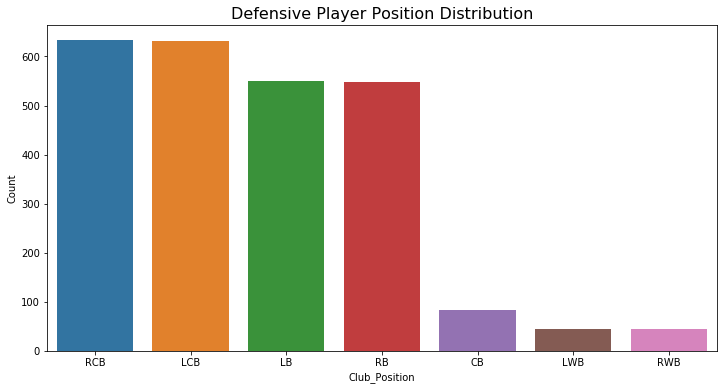

In [133]:
plt.figure(figsize=(12,6))
plt.title("Defensive Player Position Distribution", fontsize=16)
sns.barplot(data=def_grouped, x='Club_Position', y='Count')
plt.show()

Center Backs, Left Wingbacks, and Right Wingbacks have far fewer players listed than the other positions.  Perhaps this is due to differing nomenclature across the world for the same positions?

There is also undoubtedly overlap between the RCB, LCB, and CB in that Right and Left Center Backs surely fill in at Center Back from time to time.  Also, the positions names may change based on different formations being used throughout the course of a match.  This is getting out of depth of my football knowledge, let's proceed.

## 3.2 Defenders by Rating

Follow the (now familiar) group, count, sort, plot paradigm to get an idea of the ratings distribution for all defensive players.

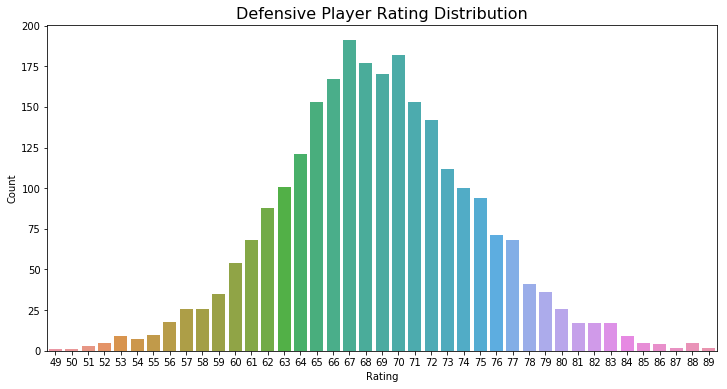

In [140]:
# group by rating, count, sort
def_by_rating = defenders.groupby(defenders['Rating']).count().reset_index()
def_by_rating = def_by_rating[['Club_Position','Rating']]
def_by_rating = def_by_rating.sort_values('Rating', ascending=False)
def_by_rating.columns = ['Count','Rating']

# plot rating distribution
plt.figure(figsize=(12,6))
plt.title("Defensive Player Rating Distribution", fontsize=16)
sns.barplot(data=def_by_rating, x='Rating', y='Count')
plt.show()

This result is about what you'd expect: many average ratings, with a few very low and very high ranked players.  The majority of the players are rated between 60 and 77.  Also looks like the data is fairly normally distributed.

# 4. Begin Defender Analysis

## 4.1 Selection of Attributes

Now that we have explored the data a bit, we can get down to analysis.  The first thing to do is view all of the columns present in the dataset.

In [145]:
# get a list of all the columns
cols = defenders.columns.tolist()

#display all results in a more compact manner
for i,col in enumerate(cols):
    if i%5 ==0:
        print(" ") #new line
    print(col,"   ", end=" ") #do not go to new line after printing each item

 
Name     Nationality     National_Position     National_Kit     Club      
Club_Position     Club_Kit     Club_Joining     Contract_Expiry     Rating      
Height     Weight     Preffered_Foot     Birth_Date     Age      
Preffered_Position     Work_Rate     Weak_foot     Skill_Moves     Ball_Control      
Dribbling     Marking     Sliding_Tackle     Standing_Tackle     Aggression      
Reactions     Attacking_Position     Interceptions     Vision     Composure      
Crossing     Short_Pass     Long_Pass     Acceleration     Speed      
Stamina     Strength     Balance     Agility     Jumping      
Heading     Shot_Power     Finishing     Long_Shots     Curve      
Freekick_Accuracy     Penalties     Volleys     GK_Positioning     GK_Diving      
GK_Kicking     GK_Handling     GK_Reflexes     

Luckily, FIFA Index can provide us with some guidance moving forward.  By viewing one of the individual player pages, we can see that the 34 specific player attributes are grouped into 7 categories.  The 5 categories we will focus on are highlighted in red below.

<img src="fifa_index_cats.jpg" style="width:600px;"/>

Eliminate Shooting attributes because that does not factor heavily into a defensive player's game.  Eliminate Goalkeeper attributes because it is unclear what this category means.

Use the Fifa index to get a list of all the attributes we will be interested in for defensive players.

In [163]:
# lists of attributes by category
ball_skills = ['Ball_Control', 'Dribbling']
passing = ['Crossing','Short_Pass','Long_Pass']
defence = ['Marking', 'Sliding_Tackle', 'Standing_Tackle']
mental = ['Aggression','Reactions','Attacking_Position','Interceptions','Vision','Composure']
physical = ['Acceleration','Stamina','Strength','Balance','Speed','Agility','Jumping']

# list of all defensive attributes
def_group_list = [ball_skills, passing, defence, mental, physical]
# flattens a list of lists
def_attrs_list = [item for sublist in def_group_list for item in sublist]
def_attrs_list

['Ball_Control',
 'Dribbling',
 'Crossing',
 'Short_Pass',
 'Long_Pass',
 'Marking',
 'Sliding_Tackle',
 'Standing_Tackle',
 'Aggression',
 'Reactions',
 'Attacking_Position',
 'Interceptions',
 'Vision',
 'Composure',
 'Acceleration',
 'Stamina',
 'Strength',
 'Balance',
 'Speed',
 'Agility',
 'Jumping']

Build a new dataframe from our defensive attributes list, the player ratings overall, position, and player name.  Dataframe should have 24 columns: 21 for the attributes and 3 additional for the fields newly added to the list.

In [161]:
new_df_list = ['Name','Club_Position','Rating'] + def_attrs_list

def_with_attrs = defenders.copy()
def_with_attrs = def_with_attrs[new_df_list]
def_with_attrs.head()

,Name,Club_Position,Rating,Ball_Control,Dribbling,Crossing,Short_Pass,Long_Pass,Marking,Sliding_Tackle,...,Interceptions,Vision,Composure,Acceleration,Stamina,Strength,Balance,Speed,Agility,Jumping
15,Thiago Silva,LCB,89,80,68,60,79,81,90,89,...,91,74,80,72,74,81,68,76,75,93
16,Sergio Ramos,LCB,89,83,61,66,76,70,85,90,...,88,63,76,77,84,81,60,78,80,92
24,Diego Godín,LCB,88,76,53,55,79,70,87,89,...,88,52,80,62,69,80,58,67,63,89
25,Mats Hummels,LCB,88,77,68,64,78,82,85,87,...,89,79,91,62,66,85,58,65,64,68
27,Giorgio Chiellini,LCB,88,55,56,58,55,59,92,90,...,88,50,78,69,69,91,65,79,59,89


Now we will reduce the overall number of attributes by taking the average of the attributes within each category.


Average is used rather than sum because the categories have different numbers of attributes, so this will allow the "category attributes" to all remain on the same scale (out of 100).

In [168]:
# could have used a loop here, but this makes it very clear what is happening
def_with_attrs['Ball_Skills'] = def_with_attrs[ball_skills].mean(axis=1)
def_with_attrs['Passing'] = def_with_attrs[passing].mean(axis=1)
def_with_attrs['Defence'] = def_with_attrs[defence].mean(axis=1)
def_with_attrs['Mental'] = def_with_attrs[mental].mean(axis=1)
def_with_attrs['Physical'] = def_with_attrs[physical].mean(axis=1)
def_with_attrs.head()

,Name,Club_Position,Rating,Ball_Control,Dribbling,Crossing,Short_Pass,Long_Pass,Marking,Sliding_Tackle,...,Strength,Balance,Speed,Agility,Jumping,Ball_Skills,Passing,Defence,Mental,Physical
15,Thiago Silva,LCB,89,80,68,60,79,81,90,89,...,81,68,76,75,93,74.0,73.333333,90.000000,77.500000,77.000000
16,Sergio Ramos,LCB,89,83,61,66,76,70,85,90,...,81,60,78,80,92,72.0,70.666667,88.000000,74.166667,78.857143
24,Diego Godín,LCB,88,76,53,55,79,70,87,89,...,80,58,67,63,89,64.5,68.000000,87.333333,73.166667,69.714286
25,Mats Hummels,LCB,88,77,68,64,78,82,85,87,...,85,58,65,64,68,72.5,74.666667,88.000000,77.666667,66.857143
27,Giorgio Chiellini,LCB,88,55,56,58,55,59,92,90,...,91,65,79,59,89,55.5,57.333333,91.333333,68.666667,74.428571


Create a new dataframe with just the grouped categories.

In [194]:
def_grouped_df_list = ['Name','Club_Position','Rating','Ball_Skills','Passing','Defence','Mental','Physical']
def_grouped = def_with_attrs[def_grouped_df_list].reset_index()
def_grouped.head()

,index,Name,Club_Position,Rating,Ball_Skills,Passing,Defence,Mental,Physical
0,15,Thiago Silva,LCB,89,74.0,73.333333,90.000000,77.500000,77.000000
1,16,Sergio Ramos,LCB,89,72.0,70.666667,88.000000,74.166667,78.857143
2,24,Diego Godín,LCB,88,64.5,68.000000,87.333333,73.166667,69.714286
3,25,Mats Hummels,LCB,88,72.5,74.666667,88.000000,77.666667,66.857143
4,27,Giorgio Chiellini,LCB,88,55.5,57.333333,91.333333,68.666667,74.428571


Now we have a concise dataframe with the attributes grouped and averaged by their more general categories.

## 4.2 Attributes vs. Rating, Visually

Create a correlation heatmap to see how the various attributes correlate to Rating and to one another.  First need to create a dataframe with just the columns we want to correlate.  Then use the pandas function .corr() to creata a corellation matrix.

In [195]:
just_cats = def_grouped[['Rating','Ball_Skills','Passing','Defence','Mental','Physical']]
just_cats = just_cats.corr()
just_cats

,Rating,Ball_Skills,Passing,Defence,Mental,Physical
Rating,1.000000,0.467982,0.540002,0.889679,0.763568,0.275776
Ball_Skills,0.467982,1.000000,0.839580,0.295610,0.707785,0.640836
Passing,0.540002,0.839580,1.000000,0.380827,0.763691,0.536702
Defence,0.889679,0.295610,0.380827,1.000000,0.593483,0.140040
Mental,0.763568,0.707785,0.763691,0.593483,1.000000,0.440334
Physical,0.275776,0.640836,0.536702,0.140040,0.440334,1.000000


Plot the correlation matrix using seaborn.

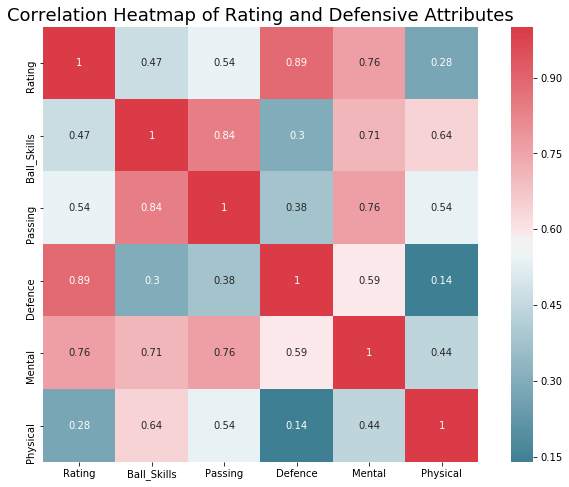

In [196]:
plt.figure(figsize=(12,8))
plt.title("Correlation Heatmap of Rating and Defensive Attributes", fontsize=18)
sns.heatmap(just_cats, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot=True)
plt.show()

From the heatmap above, we can see that ALL attributes and overall rating are positively correlated to one another.  The more red a box is, the stronger the correlation, and the more blue a box is, the weaker the correlation.

Observations:
  - Rating is most strongly correlated with the Defence attribute.  This is expected because after all, we are looking at defensive players only.
  - Rating and Mental are also highly correlated.
  - Lowest correlation on the whole map is between Physical and Defence.  It's more of a mental game to be a defender!

The remainder of our analysis will focus on the top row of this heatmap: how the different attributes affect overall player Rating.

# 5. Reveal Key Attributes with Multiple Linear Regression

## 5.1 Null Hypothesis

We are looking at the impacts of 5 different (aggregate) defensive attributes on overall player Rating.  

**Null Hypothesis: None of the attributes have a noticeable impact on the Rating.**


To test the null hypothesis, we will perform Multiple Linear Regression on the dataset using scikit-learn.

## 5.2 Regression with scikit-learn

Use the dataframe with the grouped attributes for the regression model. Create 2 new dataframes for the features and the target of the regression.  
  - The features (independent variables) are the attributes Ball Skills, Passing, Defence, Mental, and Physical.
  - The target (dependent variable) is the overal player Rating.

In [206]:
grouped_attrs = ['Ball_Skills','Passing','Defence','Mental','Physical']
features = def_grouped[grouped_attrs]
target = def_grouped[['Rating']]

Define X and y for use in scikit-learn's LinearRegression() function.  Fit the model.

In [207]:
X = features
y = target['Rating']
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

Get an R-squared score to test how well the variance is explained by the model.  Values range from 0 to 1, so the ~0.88 we returned means that almost all the variance is explained by the model.

In [208]:
lm.score(X,y)

0.87779893416824695

Moment of truth!  Find the coefficients from the model to see which attributes had the largest impact overall.

In [212]:
sk_coeffs = lm.coef_.tolist()
for attr, coef in zip(grouped_attrs, sk_coeffs):
    print("Attribute: {}, Coefficient: {}".format(attr,coef))

Attribute: Ball_Skills, Coefficient: 0.0064515377877897295
Attribute: Passing, Coefficient: -0.0029818216181492843
Attribute: Defence, Coefficient: 0.5759816559211581
Attribute: Mental, Coefficient: 0.2758208335929364
Attribute: Physical, Coefficient: 0.01979911271776172


Findings from the heatmap are confirmed.  Defence has the most impact on Rating, followed by Mental!  Passing actually has a negative impact on Rating, which may or may not be small enough that it is insignificant.

To find out which attributes actually have a meaningful impact (and to test the null hypothesis) we need to observe the p-values.  This is beyond the capability of scikit-learn.

## 5.3 Regression with statsmodels

It is possible to reuse the features (X) and target (y) variables created in Section 5.2, so setting up a model in statsmodels is very simple.  The only thing to note is that we have to add a constant in statsmodels manually.  We want to use one because we know that our Rating data does not go all the way to zero.

In [219]:
sm_y = y
sm_X = X

#add a constant to the features
sm_X = sm.add_constant(X)

# use Ordinary Least Squares
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.588e+05
Date:                Sat, 16 Dec 2017   Prob (F-statistic):               0.00
Time:                        01:04:47   Log-Likelihood:                -5694.7
No. Observations:                2534   AIC:                         1.140e+04
Df Residuals:                    2529   BIC:                         1.143e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Ball_Skills    -0.0244      0.008     -2.876      0.004      -0.041      -0.008
Passing        -0.0144      0.009     -1.637      0.102      -0.032       0.003
Defence         0.6623      0.007     94.045      0.000       0.648       0.676
Mental          0.3000      0.011     26.758      0.000       0.278       0.322
Physical        0.1274      0.006     20.080      0.000       0.115       0.140
==============================================================================
Omnibus:                     1549.719   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60762.831
Skew:                           2.287   Prob(JB):                         0.00
Kurtosis:                      26.549   Cond. No.                         39.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the coefficients above, it is clear that Defence and Mental still have the most impact on player Rating.


It is interesting to note that the impact from Passing is indeed negligible.  From the p-values above (P>|t| column) we can see that it is the only one above a critical value of 5% (p-value of 0.05).  The remainder of the p-values are well below 0.05, which means they have significance within the model.


A point of concern is the R-squared result of 0.999.  This indicates that we may have overfit the model.  We will see how our data works with training and test sets in the next section, which will lend some insight about overfitting.

# 6. Predict Rating From Attributes with Machine Learning

## 6.1 Predictions with Train/Test Split

## 6.2 Refine and (Hopefully) Improve the Model with Cross Validation

# 7. Conclusions

## 7.1 Key Attributes

## 7.2 Prediction of Overall Rating